In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
img = cv2.imread('./test_images/sarapova.jpg')
img.shape

(1024, 682, 3)

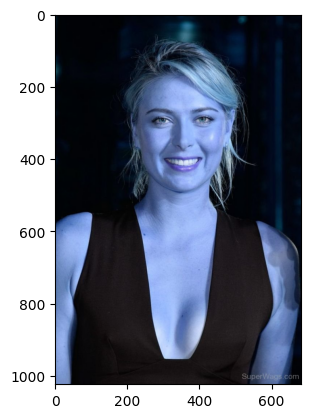

In [4]:
plt.imshow(img)


In [5]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape

(1024, 682)

In [6]:
gray

array([[ 26,  26,  25, ...,  11,   9,   9],
       [ 26,  26,  25, ...,  11,  10,  10],
       [ 25,  25,  24, ...,  11,  11,  11],
       ...,
       [157, 157, 157, ...,   3,   3,   3],
       [156, 157, 157, ...,   3,   3,   3],
       [155, 156, 157, ...,   3,   3,   3]], dtype=uint8)

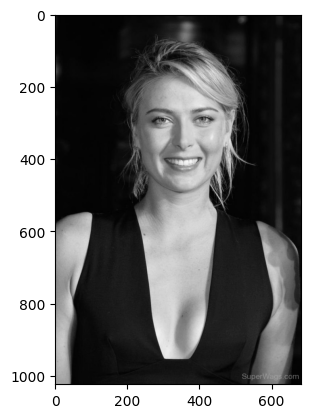

In [7]:
plt.imshow(gray,cmap='gray')

In [24]:
face_cascade = cv2.CascadeClassifier('./haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./haarcascades/haarcascade_eye.xml')
faces=face_cascade.detectMultiScale(gray,1.3,5)
faces

array([[201, 173, 308, 308]])

In [25]:
(x,y,w,h) = faces[0]
x,y,w,h

(201, 173, 308, 308)

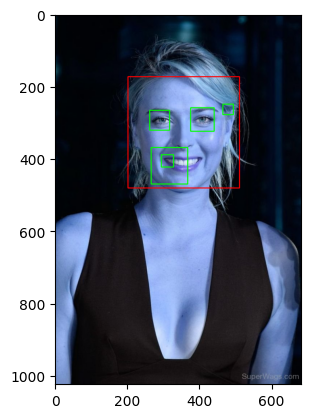

In [26]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

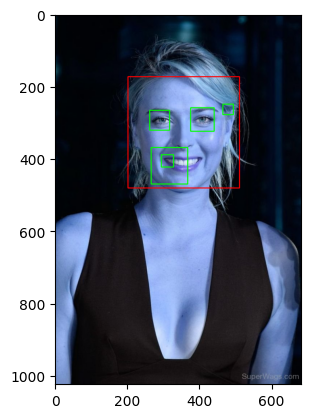

In [27]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h,x:x+w]
    roi_color = face_img[y:y+h,x:x+w]
    eyes=eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
plt.figure()
plt.imshow(face_img,cmap='gray')
plt.show()

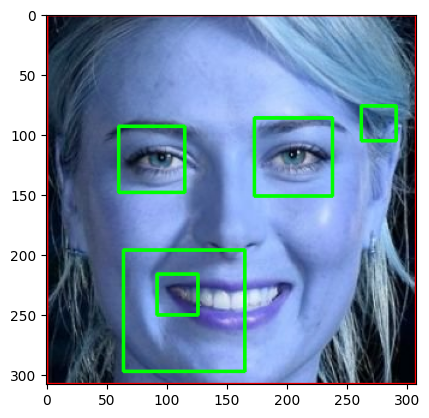

In [28]:
%matplotlib inline
plt.imshow(roi_color,cmap='gray')

In [29]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

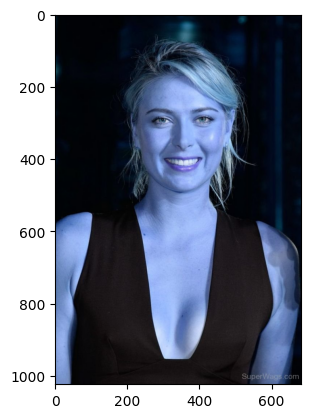

In [33]:
original_image = cv2.imread('./test_images/sarapova.jpg')
plt.imshow(original_image)

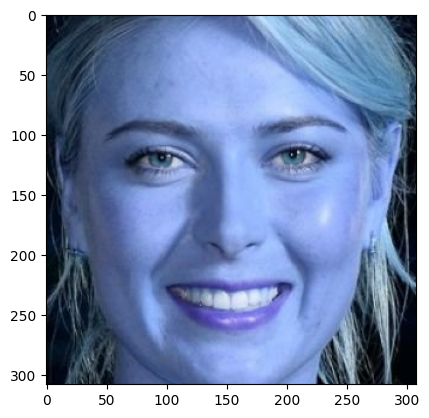

In [34]:
cropped_image = get_cropped_image_if_2_eyes('./test_images/sarapova.jpg')
plt.imshow(cropped_image)

In [48]:
path_to_data="./datasets/"
path_to_cr_data="./datasets/cropped"

In [49]:
import os

In [50]:
img_dirs=[]
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [51]:
img_dirs

['./datasets/cropped',
 './datasets/lionel_messi',
 './datasets/maria_sharapova',
 './datasets/roger_federer',
 './datasets/serena_williams',
 './datasets/virat_kohli']

In [52]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [53]:
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)

cropped
lionel_messi
maria_sharapova
roger_federer
serena_williams
virat_kohli


In [54]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data +"/"+ celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1    

cropped
lionel_messi
Generating cropped images in folder:  ./datasets/cropped/lionel_messi
maria_sharapova
Generating cropped images in folder:  ./datasets/cropped/maria_sharapova
roger_federer
Generating cropped images in folder:  ./datasets/cropped/roger_federer
serena_williams
Generating cropped images in folder:  ./datasets/cropped/serena_williams
virat_kohli
Generating cropped images in folder:  ./datasets/cropped/virat_kohli


In [55]:

import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode)
    imArray_H *= 255
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

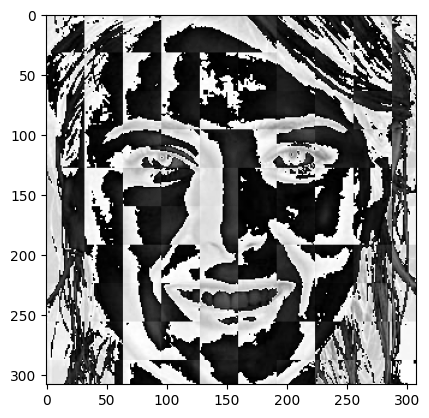

In [56]:
im_har = w2d(cropped_image,'db1',5)
plt.imshow(im_har, cmap='gray')

In [57]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'cropped': 0,
 'lionel_messi': 1,
 'maria_sharapova': 2,
 'roger_federer': 3,
 'serena_williams': 4,
 'virat_kohli': 5}

In [58]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])  

In [ ]:
len(X)

164

In [60]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(164, 4096)

In [62]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.8536585365853658

In [64]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [65]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [66]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

c:\Users\anujn\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\anujn\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\anujn\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\anujn\AppData\Local\Programs\Python\P

,model,best_score,best_params
0,svm,0.821000,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.659000,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.837333,{'logisticregression__C': 1}


In [67]:
best_estimators['svm'].score(X_test,y_test)

0.8536585365853658

In [68]:
best_estimators['random_forest'].score(X_test,y_test)

0.7560975609756098

In [69]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.8292682926829268

In [70]:
best_clf = best_estimators['svm']

In [71]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[ 6,  0,  0,  1,  0],
       [ 1,  8,  0,  0,  1],
       [ 0,  0,  3,  1,  0],
       [ 0,  0,  0,  6,  0],
       [ 1,  0,  1,  0, 12]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

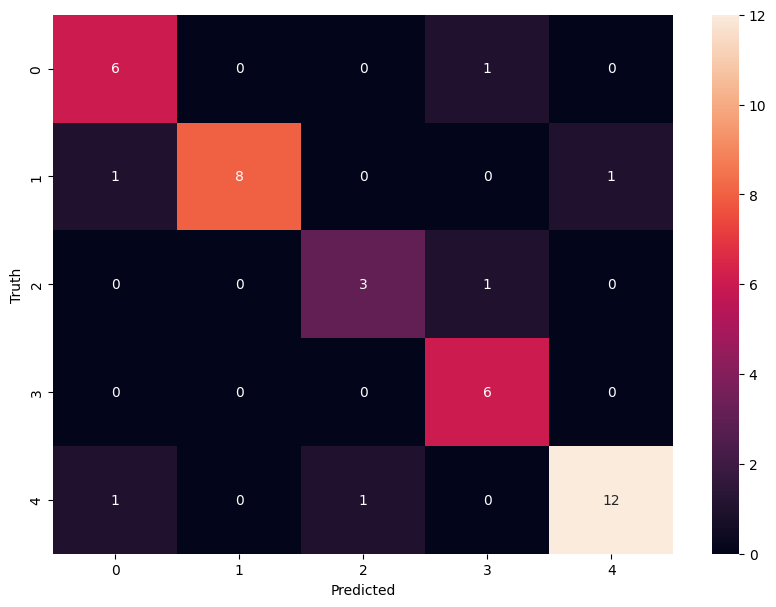

In [72]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [73]:
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 

['saved_model.pkl']

In [74]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))